<a href="https://colab.research.google.com/github/2000siddharth/datascience/blob/master/task_loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.drop('Loan_ID', axis=1, inplace=True)

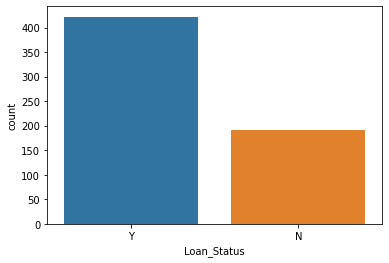

In [10]:
sns.countplot(df['Loan_Status'])

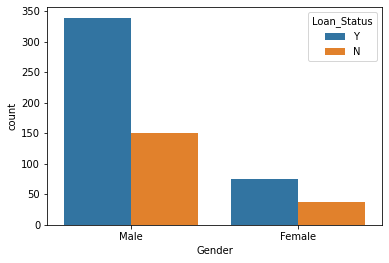

In [12]:
sns.countplot(df['Gender'], hue=df['Loan_Status'])

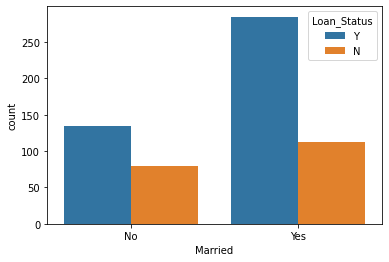

In [13]:
sns.countplot(df['Married'], hue=df['Loan_Status'])

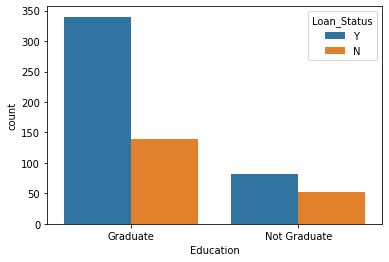

In [14]:
sns.countplot(df['Education'], hue=df['Loan_Status'])

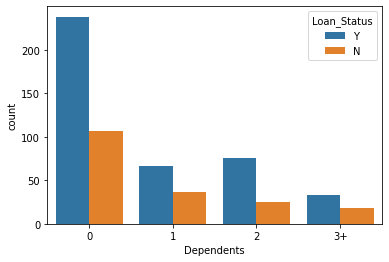

In [15]:
sns.countplot(df['Dependents'], hue=df['Loan_Status'])

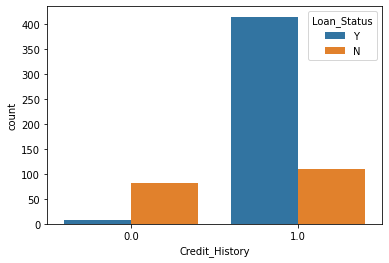

In [24]:
sns.countplot(df['Credit_History'], hue=df['Loan_Status'])

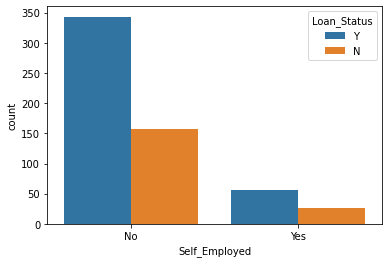

In [19]:
sns.countplot(df['Self_Employed'], hue=df['Loan_Status'])

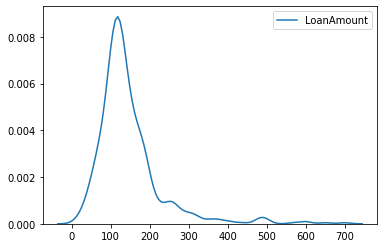

In [16]:
sns.kdeplot(df['LoanAmount'])

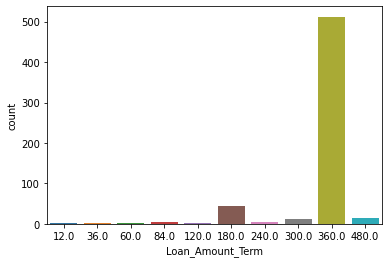

In [28]:
sns.countplot(df['Loan_Amount_Term'])

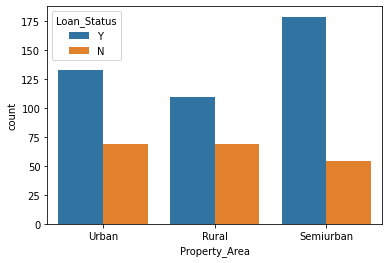

In [35]:
sns.countplot(df['Property_Area'], hue=df['Loan_Status'])

In [17]:
df['Gender'].fillna('Male', inplace=True)
df['Married'].fillna('Yes', inplace=True)

In [20]:
df['Self_Employed'].fillna('No', inplace=True)

In [23]:
df['Credit_History'].fillna(1.0, inplace=True)

In [26]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [30]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Married'] = df['Married'].map({'Yes':1,'No':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})

In [51]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})

In [31]:
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})

In [32]:
df['Singleton'] = df['Dependents'].map(lambda d: 1 if d=='1' else 0)
df['Small_Family'] = df['Dependents'].map(lambda d: 1 if d=='2' else 0)
df['Large_Family'] = df['Dependents'].map(lambda d: 1 if d=='3+' else 0)
df.drop(['Dependents'], axis=1, inplace=True)

In [36]:
df['Property_Area'] = df['Property_Area'].map({'Semiurban' : 3, 'Urban' : 2, 'Rural': 1})

In [38]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [40]:
df['Very_Short_Term'] = df['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
df['Short_Term'] = df['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
df['Long_Term'] = df['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
df['Very_Long_Term'] = df['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
df.drop('Loan_Amount_Term', axis=1, inplace=True)

In [42]:
df['Credit_History_Bad'] = df['Credit_History'].map(lambda c: 1 if c==0 else 0)
df['Credit_History_Good'] = df['Credit_History'].map(lambda c: 1 if c==1 else 0)
df.drop('Credit_History', axis=1, inplace=True)

In [43]:
df['Debt_Income_Ratio'] = df['Total_Income'] / df['LoanAmount']

In [44]:
df.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Property_Area,Loan_Status,Singleton,Small_Family,Large_Family,Total_Income,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Debt_Income_Ratio
0,1,0,1,0,128.0,2,Y,0,0,0,5849.0,0,0,0,1,0,1,45.695312
1,1,1,1,0,128.0,1,N,1,0,0,6091.0,0,0,0,1,0,1,47.585938
2,1,1,1,1,66.0,2,Y,0,0,0,3000.0,0,0,0,1,0,1,45.454545
3,1,1,0,0,120.0,2,Y,0,0,0,4941.0,0,0,0,1,0,1,41.175000
4,1,0,1,0,141.0,2,Y,0,0,0,6000.0,0,0,0,1,0,1,42.553191


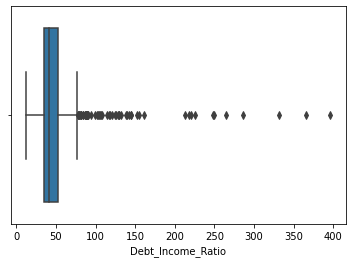

In [45]:
sns.boxplot(df['Debt_Income_Ratio'], hue=df['Loan_Status'])

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
df[['LoanAmount', 'Total_Income', 'Debt_Income_Ratio']] = scaler.fit_transform(df[['LoanAmount', 'Total_Income', 'Debt_Income_Ratio']])

In [52]:
df.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Property_Area,Loan_Status,Singleton,Small_Family,Large_Family,Total_Income,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Debt_Income_Ratio
0,1,0,1,0,0.172214,2,1,0,0,0,0.055394,0,0,0,1,0,1,0.087450
1,1,1,1,0,0.172214,1,0,1,0,0,0.058435,0,0,0,1,0,1,0.092370
2,1,1,1,1,0.082489,2,1,0,0,0,0.019583,0,0,0,1,0,1,0.086824
3,1,1,0,0,0.160637,2,1,0,0,0,0.043980,0,0,0,1,0,1,0.075687
4,1,0,1,0,0.191027,2,1,0,0,0,0.057292,0,0,0,1,0,1,0.079274


In [53]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, shuffle=True, stratify=y)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, classification_report

In [57]:
rf1 = RandomForestClassifier()

In [58]:
n_estimators = [200, 300, 500, 400]
max_depth = [4,6,5, 7,8]
min_samples_split = [6,8,9,7]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split)

gridF = GridSearchCV(rf1, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.8min finished


In [59]:
# summarize results
print("Best: %f using %s" % (bestF.best_score_, bestF.best_params_))

Best: 0.797203 using {'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 300}


In [82]:
rf_best = RandomForestClassifier(max_depth= 6, min_samples_split= 6, n_estimators= 300, min_samples_leaf=3, max_features='sqrt')

In [83]:
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))

[[ 34  24]
 [  5 122]]
Accuracy of our model is:  0.8432432432432433


In [76]:
print(cohen_kappa_score(y_test, y_pred))

0.6002533343268013


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70        58
           1       0.84      0.96      0.89       127

    accuracy                           0.84       185
   macro avg       0.85      0.77      0.80       185
weighted avg       0.85      0.84      0.83       185



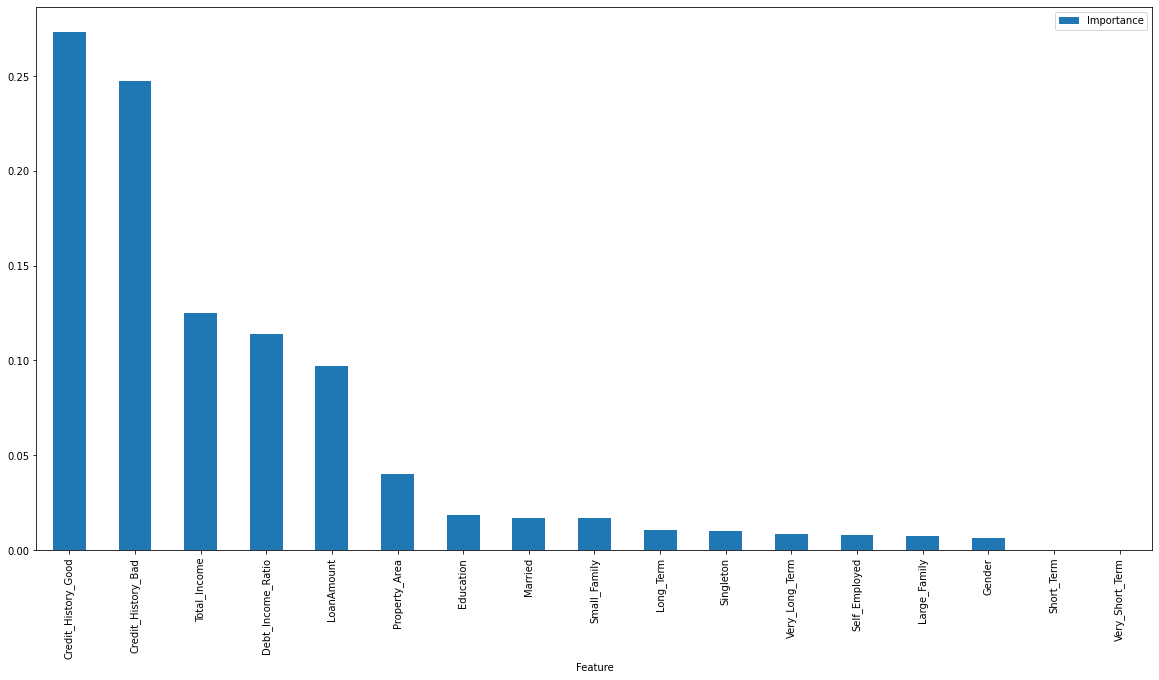

In [68]:
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['Importance'] = rf_best.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

features.plot(kind='bar', figsize=(20, 10))

In [ ]:
from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [ 1, 10, 100], 
            'gamma': [ 0.1, 0.01, 0.001], 
            'kernel': ['rbf', 'poly']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 

In [70]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [79]:
y_pred_svm = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_svm))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred_svm))

[[ 32  26]
 [  2 125]]
Accuracy of our model is:  0.8486486486486486


In [80]:
print(cohen_kappa_score(y_test, y_pred_svm))

0.6038543897216273


In [81]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185



In [73]:
from sklearn.metrics import cohen_kappa_score

In [84]:
print(cohen_kappa_score(y_pred_svm, y_pred))

0.9147701096471021


In [8]:
df1 = pd.read_csv('test.csv')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
